In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [26]:
# Load the dataset
df = pd.read_csv('Admission_Predict.csv')

In [27]:
# Display the first few rows of the dataset
print(df.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [28]:
# a) Data Preprocessing
# Drop unnecessary columns (if any)
df.drop(columns=['Serial No.'], inplace=True)

In [29]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [30]:
# Feature Scaling (Standardize GRE, TOEFL, and GPA scores)
scaler = StandardScaler()
df[['GRE Score', 'TOEFL Score', 'CGPA']] = scaler.fit_transform(df[['GRE Score', 'TOEFL Score', 'CGPA']])

In [39]:
# Define features (GRE Score, TOEFL Score, CGPA) and target variable (Admitted)
df.columns = df.columns.str.strip()
X = df[['GRE Score', 'TOEFL Score', 'CGPA']]
y = df['Chance of Admit']

# Example: Admit if Chance >= 0.75
df['Admit'] = (df['Chance of Admit'] >= 0.75).astype(int)

# Then use this as the target
y = df['Admit']

In [40]:
# b) Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# c) Apply Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


In [42]:
# d) Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.85


In [43]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86        47
           1       0.76      0.94      0.84        33

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.87      0.85      0.85        80



In [44]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[37 10]
 [ 2 31]]


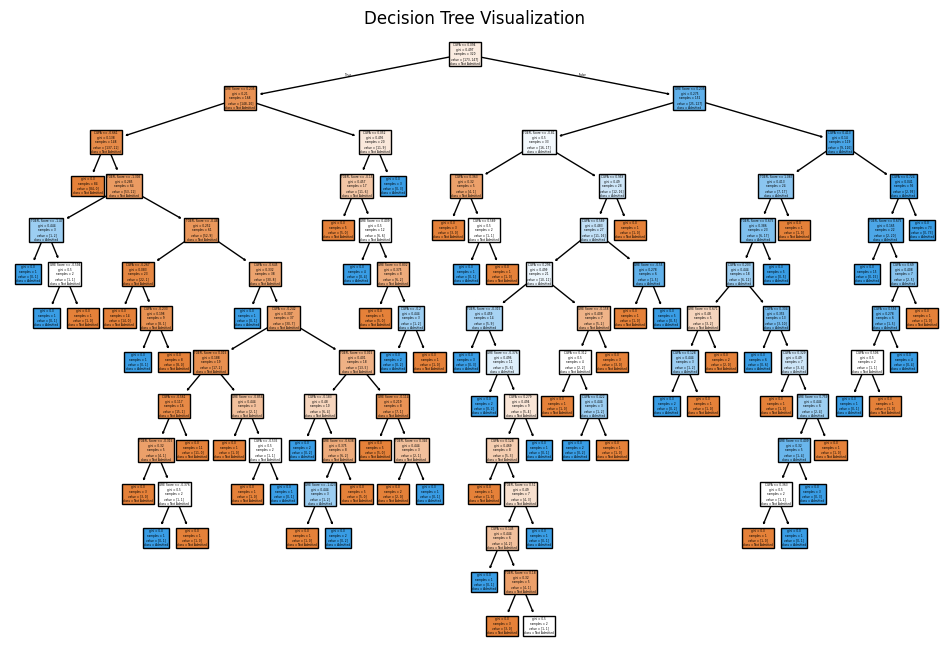

In [46]:

# Visualize the Decision Tree (Optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['GRE Score', 'TOEFL Score', 'CGPA'], class_names=['Not Admitted', 'Admitted'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()